# Diabetics Data Analysis

## Project Purpose

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2


## MetaData

Pregnancies: Number of times pregnant

Glucose: The plasma glucose concentration in the oral glucose tolerance test after two hours

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: This function calculates the likelihood of having diabetes based on the lineage of a descendant

Age: Age (years)

Outcome: Class variable (have the disease (1) or not (0))

## Import required Libraries

In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Read dataset

In [54]:
df= pd.read_csv("C:/Users/39375/Desktop/Gayu/VIRTUAL INTERNSHIP/MeriSkill/diabetics.csv")

In [55]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploratory Data Analysis

### Show first N rows of Dataframe

In [56]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Check shape of the dataset

In [57]:
df.shape

(768, 9)

we have 768 rows and 9 columns

### Variable name in Dataset

In [58]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Information about the Dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Describe the Dataset

In [60]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Number of Unique values in variables

In [61]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### The Distribution of the Outcome variable

In [62]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

## Data Preprocessing

## Check duplicate values in Dataset

In [63]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

## check Null values in dataset

In [64]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the dataset.

### Check 0 values in Dataset

In [65]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Replace 0 values with Median

In [66]:
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].median()},inplace = True)

### Again checking for 0 values

In [67]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Now the zero values are replaced by median value.

## Outlier Observation Analysis

### Check outliers in variables

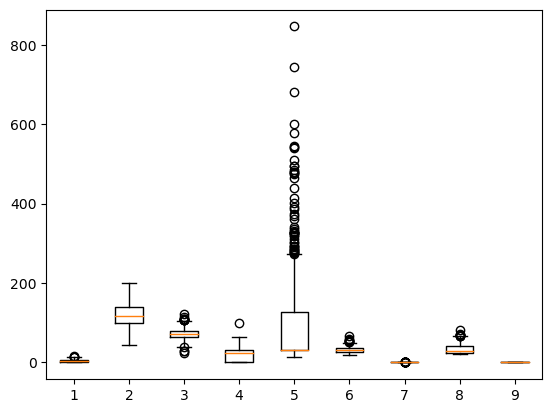

In [68]:
plt.boxplot(df);

There are lot of outliers.

### Outlier Detection

In [69]:
def outlier_removal():
    l = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_removal()

### Outlier recheck

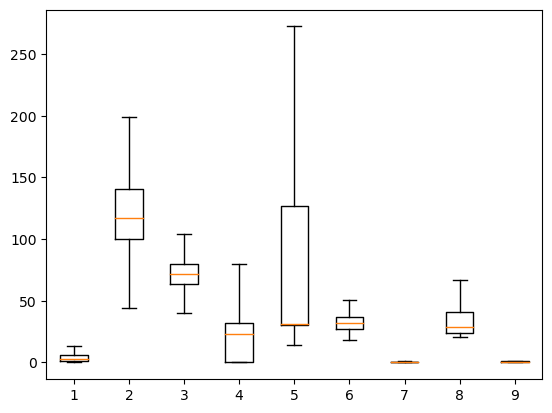

In [70]:
plt.boxplot(df);

After the outlier detection and removal , all outliers are processed.

## Visualization of the dataset

### Data distribution of variables

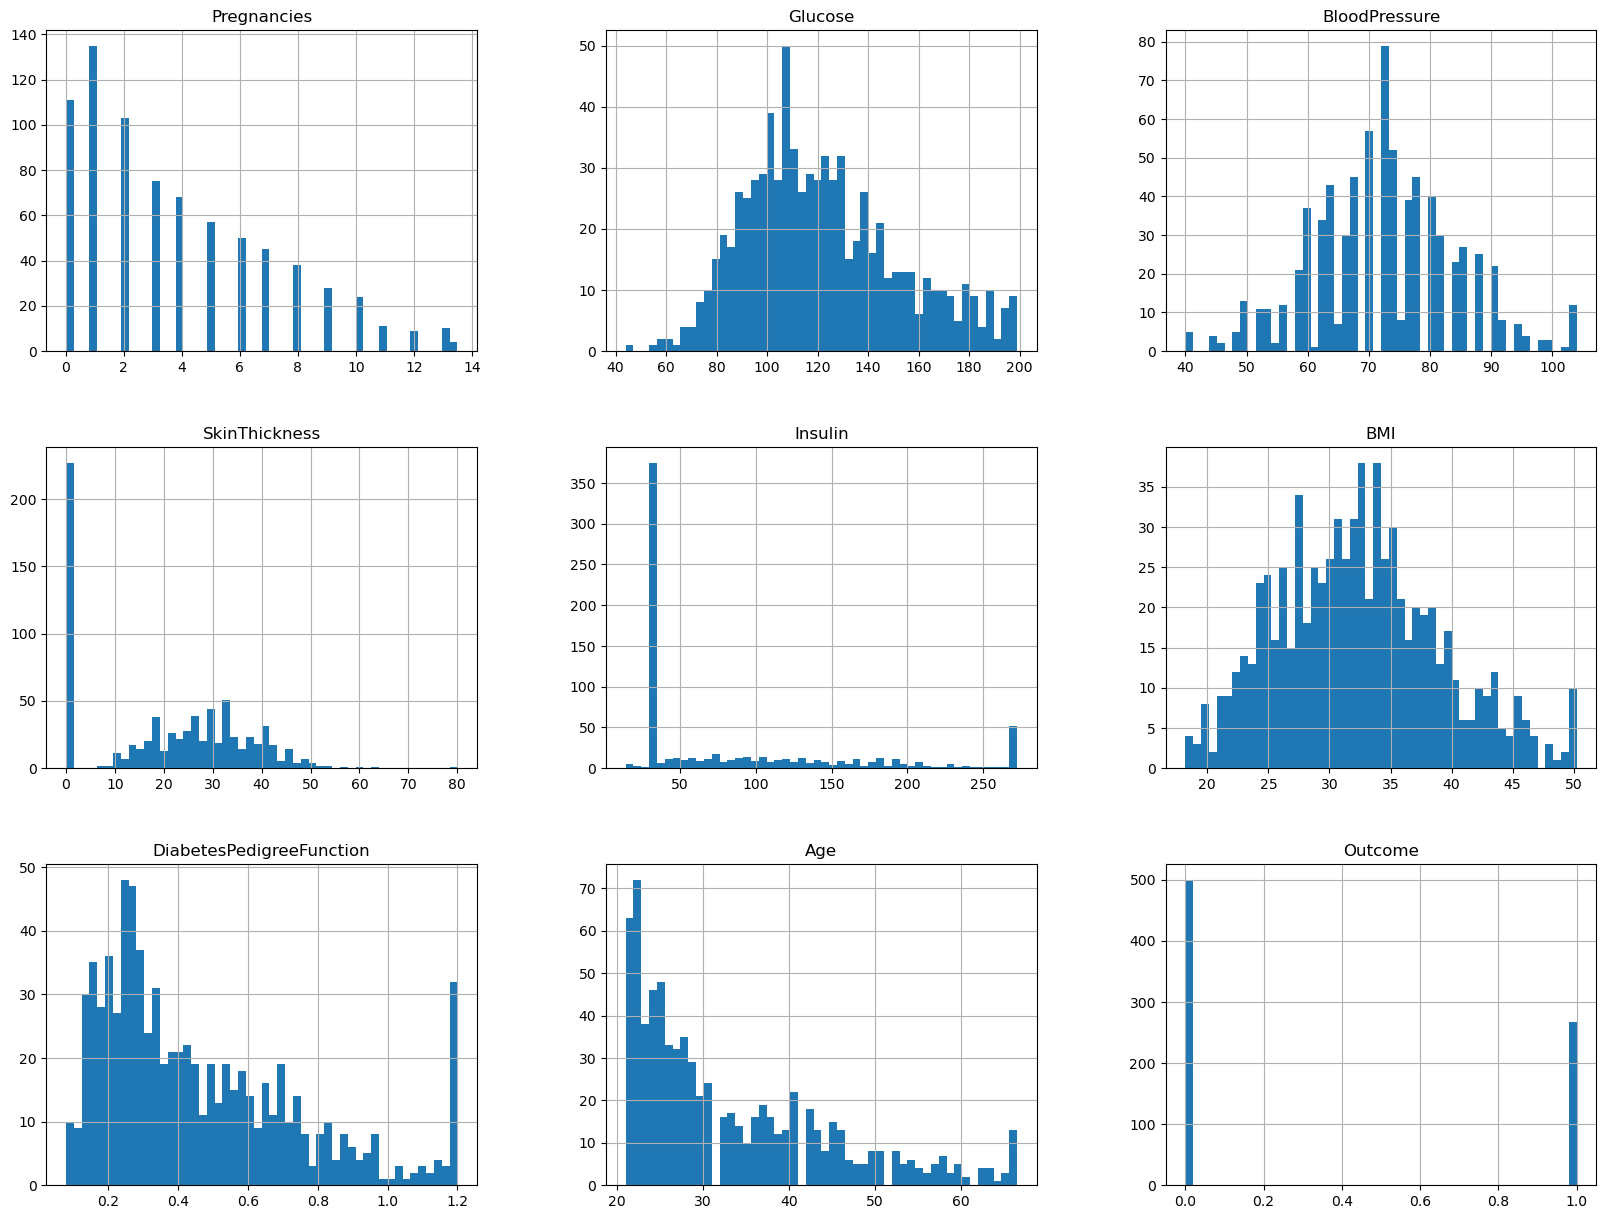

In [71]:
df.hist(bins=50, figsize=(20,15));

### The number of women in different age group with Diabetics

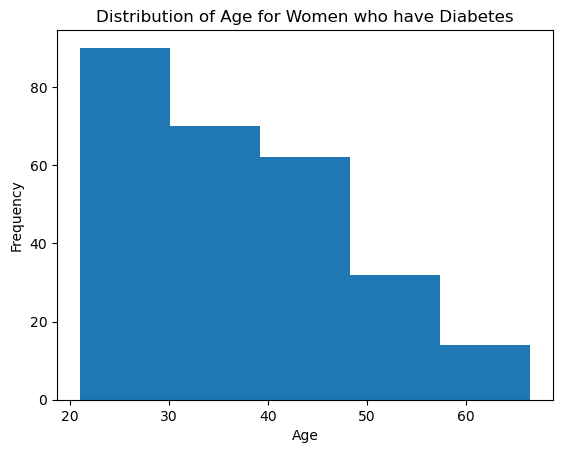

In [72]:
plt.hist(df[df['Outcome']==1]['Age'],bins=5)
plt.title('Distribution of Age for Women who have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age range of 22 to 30 has the highest proportion of women with diabetes. As age increases, the frequency of women with diabetes decreases.

### The number of women in different age group with  No Diabetics

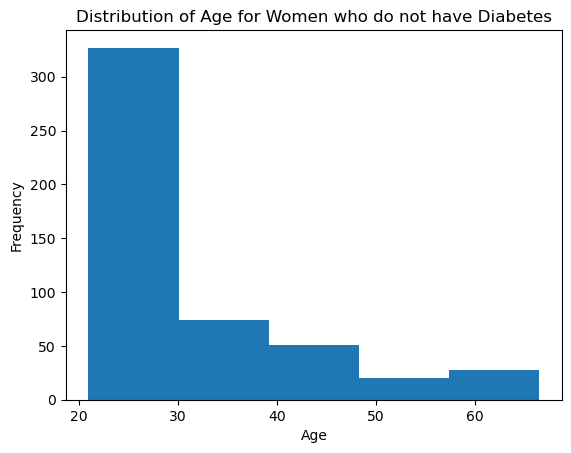

In [73]:
plt.hist(df[df['Outcome']==0]['Age'],bins=5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Women without diabetes are predominantly in the 22 to 35 age bracket. This age bracket also has the highest diabetes risk among women.

### Checking correlation between variables

In [74]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126856,0.210906,-0.084349,-0.061192,0.027145,-0.017398,0.549695,0.220392
Glucose,0.126856,1.000000,0.220199,0.071090,0.338429,0.233953,0.118457,0.268912,0.492782
BloodPressure,0.210906,0.220199,1.000000,0.013501,-0.033847,0.286410,0.012305,0.332898,0.168971
SkinThickness,-0.084349,0.071090,0.013501,1.000000,0.464759,0.382740,0.177920,-0.119170,0.073125
Insulin,-0.061192,0.338429,-0.033847,0.464759,1.000000,0.207474,0.191870,-0.040448,0.147295
BMI,0.027145,0.233953,0.286410,0.382740,0.207474,1.000000,0.138541,0.035861,0.313030
DiabetesPedigreeFunction,-0.017398,0.118457,0.012305,0.177920,0.191870,0.138541,1.000000,0.047289,0.184969
Age,0.549695,0.268912,0.332898,-0.119170,-0.040448,0.035861,0.047289,1.000000,0.242702
Outcome,0.220392,0.492782,0.168971,0.073125,0.147295,0.313030,0.184969,0.242702,1.000000


### Correlation of Output variable with other variables in decreasing order

In [75]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.313030
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.184969
BloodPressure               0.168971
Insulin                     0.147295
SkinThickness               0.073125
Name: Outcome, dtype: float64

### Heatmap of Correlation

Text(0.5, 1.0, 'correlation of feature')

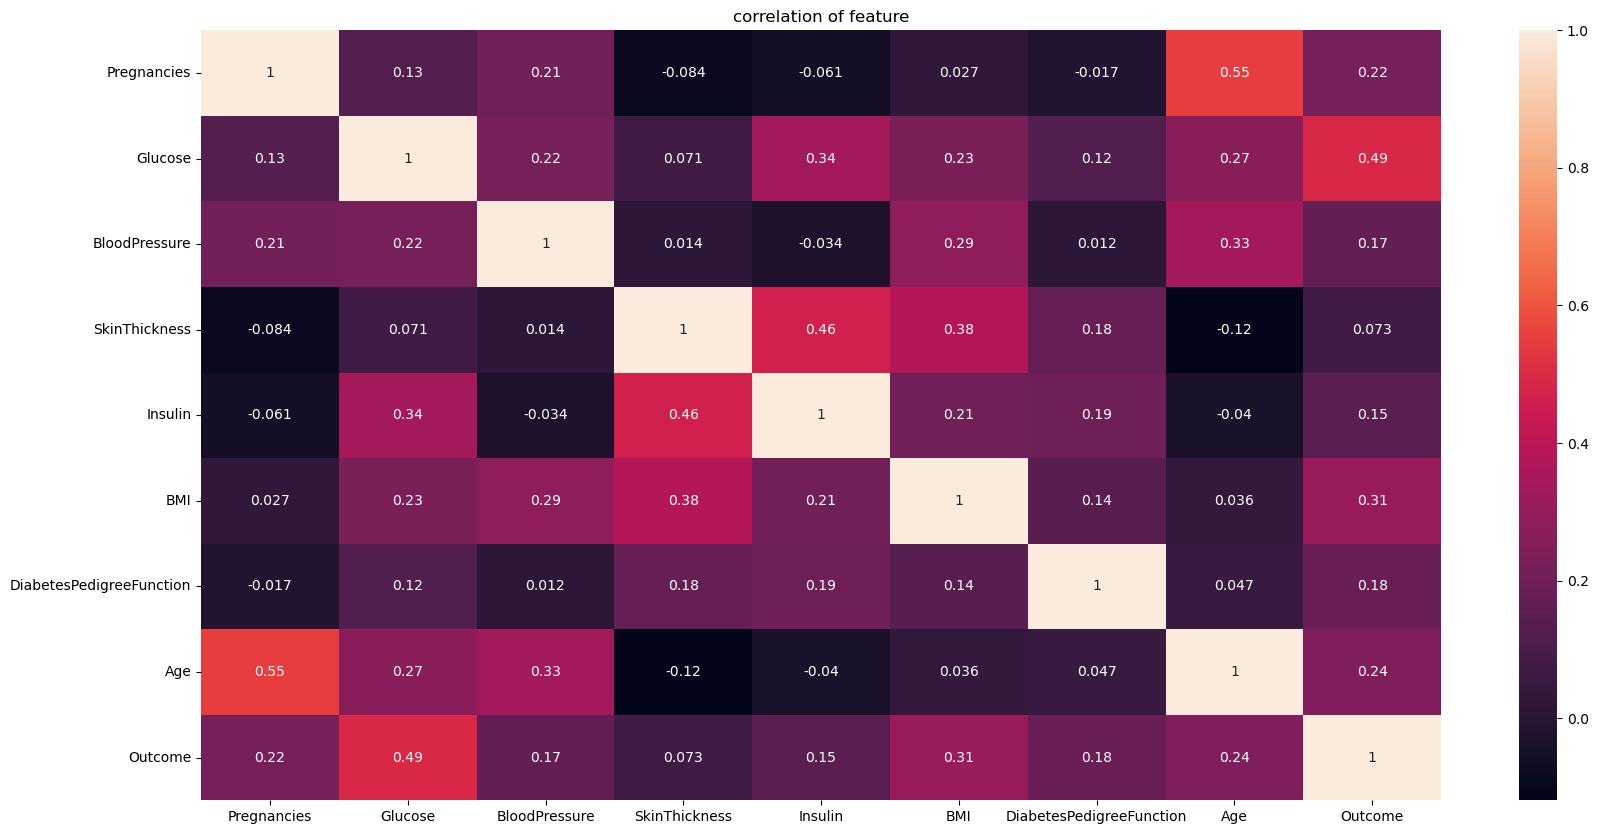

In [76]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("correlation of feature")

According to the correlation outcome ratios, the most important features are BMI, age, and pregnancies (external factors), and glucose and insulin (internal factors), in that order. 
The least important features are skin thickness and blood pressure. 
The main conclusions are: 
1. Maintain a healthy BMI to prevent high glucose and insulin levels. 
2. Monitor your glucose and insulin levels as you age. 
3. If you are pregnant, be careful about your glucose and insulin levels.

### Output variable distribution

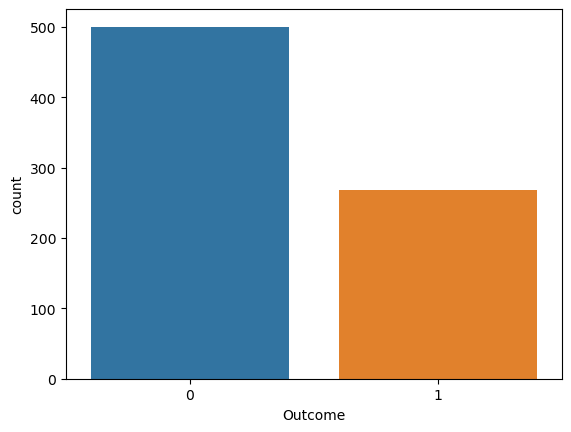

In [77]:
sns.countplot(x ='Outcome', data = df);

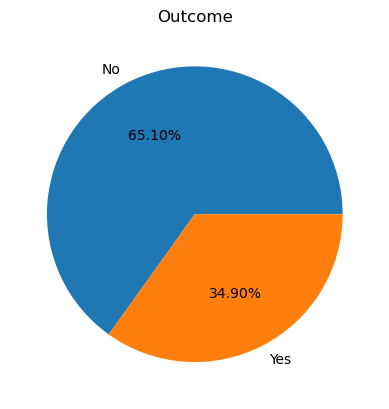

In [78]:
plt.title('Outcome')
plt.pie(df['Outcome'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()

The percentage of Diabetics in Pregancies are 34.90% and non- diabetics are 65.10%

### Pairplot of dataset variables relation with Outcome

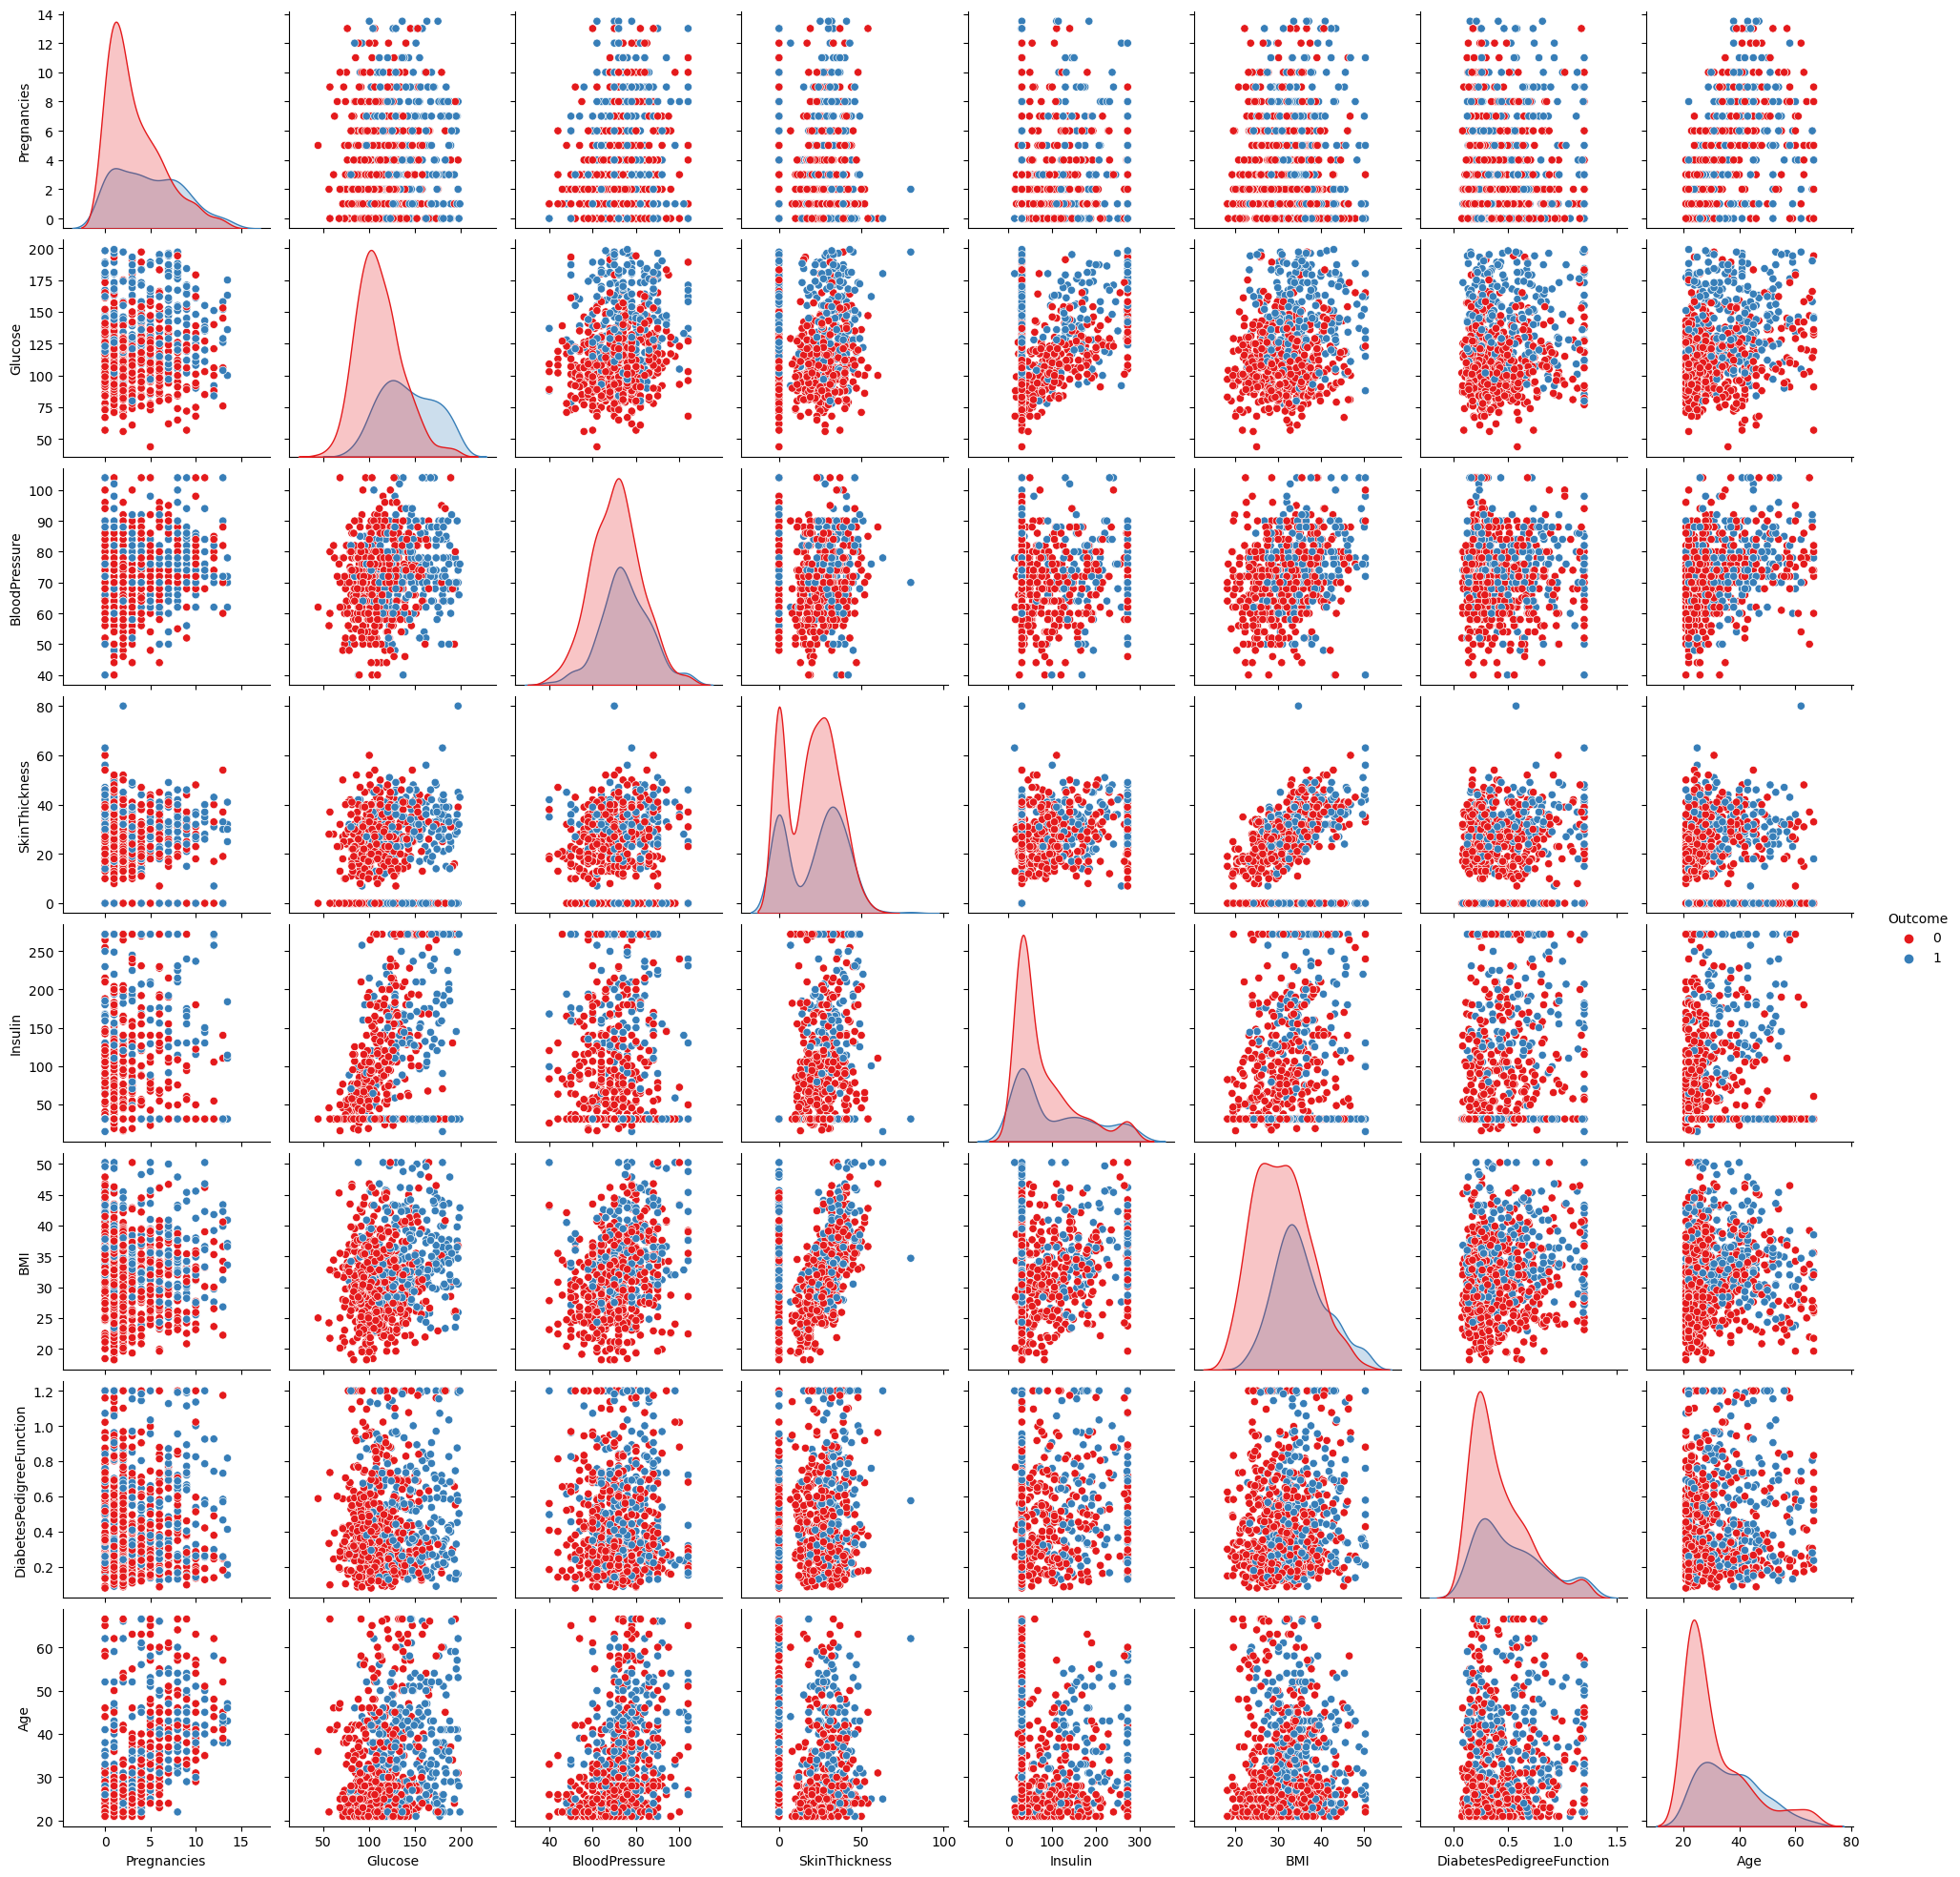

In [79]:
sns.pairplot(df, hue='Outcome', palette="Set1")

High glucose levels in pregnancy make diabetes more likely.
A combination of high glucose levels and a BMI above 30 boosts the risk of diabetes.The risk of diabetes increases with high glucose levels and other variables.

### Histplot of dataset variables with Outcome

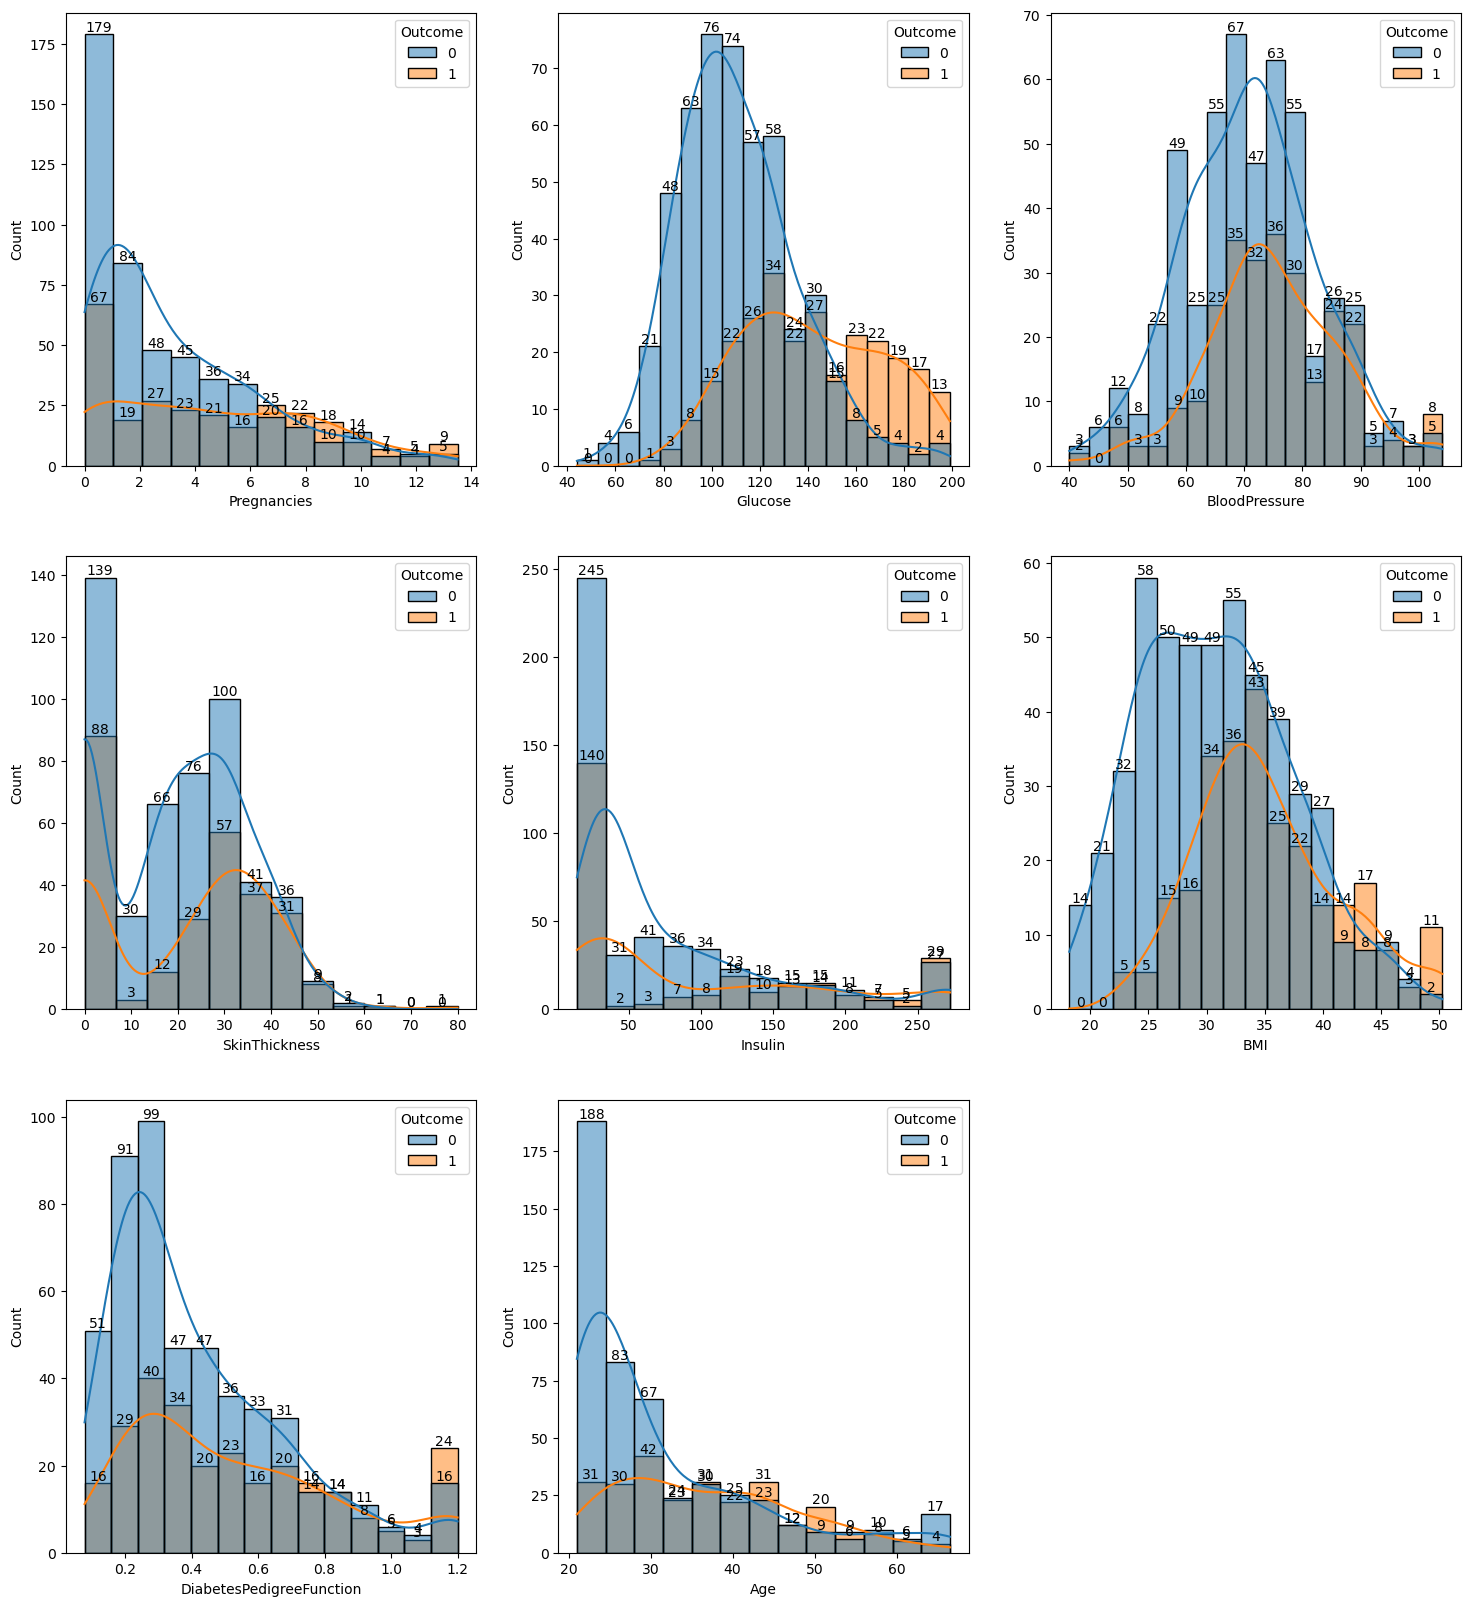

In [80]:
pno = 1
plt.figure(figsize=(18,20))
for i in df.columns:
        if pno<9:
            plt.subplot(3,3,pno)
            ax = sns.histplot(data = df , x = i , hue = df.Outcome , kde = True);
            plt.xlabel(i)
            pno+=1
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)

## Key Insights 

The following factors affect the risk of diabetes, according to the data analysis:

1. Pregnancies: More pregnancies mean higher diabetes risk.
2. Glucose: Diabetes is more likely with high glucose levels (above 140).
3. Blood pressure: Blood pressure between 60 and 90 has more diabetic people than other ranges.
4. Skin thickness: Skin thickness makes diabetes more likely.
5. Insulin: Insulin levels influence diabetes, and higher insulin levels increase the diabetes risk.
6. BMI: Higher BMI (above 30) increases the risk of diabetes.
7. Age: Age makes diabetes more likely.